<a href="https://colab.research.google.com/github/ss21462/CE888/blob/main/employee%20satisfaction%20index%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [2]:
from google.colab import files
u=files.upload()

Saving Employee Satisfaction Index.csv to Employee Satisfaction Index.csv


In [3]:
import pandas as pd
df=pd.read_csv('/content/Employee Satisfaction Index.csv')
df

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [5]:
df.dtypes

Unnamed: 0           int64
emp_id              object
age                  int64
Dept                object
location            object
education           object
recruitment_type    object
job_level            int64
rating               int64
onsite               int64
awards               int64
certifications       int64
salary               int64
satisfied            int64
dtype: object

In [6]:
print ('number of rows before dropping NaNS')
print(len(df))
df=df.dropna()
print ('number of rows after dropping NaNS')
print(len(df))

number of rows before dropping NaNS
500
number of rows after dropping NaNS
500


In [7]:
df = pd.get_dummies(df)
df

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied,emp_id_HR1004,emp_id_HR1098,emp_id_HR1197,emp_id_HR1635,emp_id_HR1663,emp_id_HR1863,emp_id_HR1878,emp_id_HR1956,emp_id_HR1980,emp_id_HR2059,emp_id_HR2069,emp_id_HR2148,emp_id_HR2167,emp_id_HR2218,emp_id_HR2585,emp_id_HR2648,emp_id_HR2693,emp_id_HR2757,emp_id_HR2802,emp_id_HR2931,emp_id_HR2986,emp_id_HR3156,emp_id_HR3205,emp_id_HR3327,emp_id_HR3427,emp_id_HR3454,emp_id_HR3479,emp_id_HR3782,emp_id_HR3849,emp_id_HR3914,emp_id_HR3950,...,emp_id_TECH7546,emp_id_TECH7614,emp_id_TECH7617,emp_id_TECH7731,emp_id_TECH7949,emp_id_TECH8022,emp_id_TECH8079,emp_id_TECH8253,emp_id_TECH8266,emp_id_TECH8339,emp_id_TECH8357,emp_id_TECH8509,emp_id_TECH8526,emp_id_TECH8543,emp_id_TECH8554,emp_id_TECH8734,emp_id_TECH8860,emp_id_TECH8992,emp_id_TECH9004,emp_id_TECH9010,emp_id_TECH9050,emp_id_TECH9322,emp_id_TECH9529,emp_id_TECH9792,emp_id_TECH9838,emp_id_TECH9901,emp_id_TECH9958,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_City,location_Suburb,education_PG,education_UG,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0,28,5,2,0,1,0,86750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
1,1,50,3,5,1,2,1,42419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
2,2,43,4,1,0,2,0,65715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,3,44,2,3,1,0,0,29805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
4,4,33,2,1,0,5,0,29805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,49,2,5,0,6,0,29805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
496,496,24,2,4,0,2,0,29805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
497,497,34,1,3,0,2,0,24076,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
498,498,26,2,1,1,1,1,29805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0


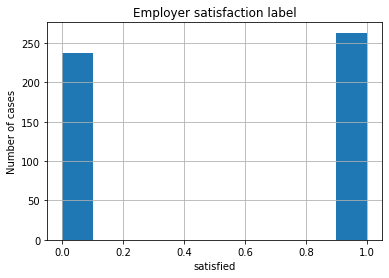

In [22]:
hist1=df['satisfied'].hist()

fig=hist1.get_figure()

pl.title('Employer satisfaction label')
pl.xlabel('satisfied')
pl.ylabel('Number of cases')

fig.savefig('balanced1')

In [9]:
imbalance=len(df[df['satisfied']==1])/len(df['satisfied'])*100
imbalance

52.6

In [10]:
y=df['satisfied'].copy()
x=df.drop(['satisfied'],axis=1)

print(f'Distribution before imbalancing: {Counter(y)}')
X_res, y_res = make_imbalance(x, y,
                              sampling_strategy={0: 142, 1: 263},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res)}')

Distribution before imbalancing: Counter({1: 263, 0: 237})
Distribution after imbalancing: Counter({1: 263, 0: 142})


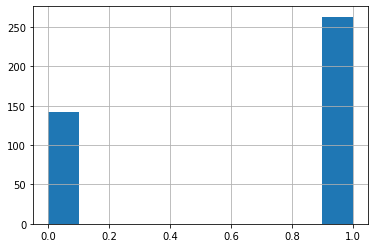

In [11]:
y_res.hist()  #65% imbalance

In [12]:

print(f'Distribution before imbalancing: {Counter(y)}')
X_res1, y_res1 = make_imbalance(x, y,
                              sampling_strategy={0: 88, 1: 263},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res1)}')

Distribution before imbalancing: Counter({1: 263, 0: 237})
Distribution after imbalancing: Counter({1: 263, 0: 88})


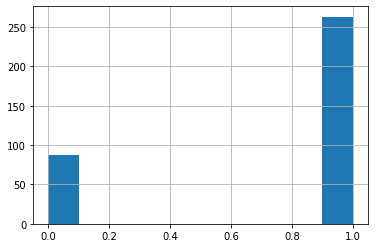

In [14]:
y_res1.hist() # 75 percent imbalance

In [15]:

print(f'Distribution before imbalancing: {Counter(y)}')
X_res2, y_res2 = make_imbalance(x, y,
                              sampling_strategy={0: 14, 1: 263},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_res2)}')

Distribution before imbalancing: Counter({1: 263, 0: 237})
Distribution after imbalancing: Counter({1: 263, 0: 14})


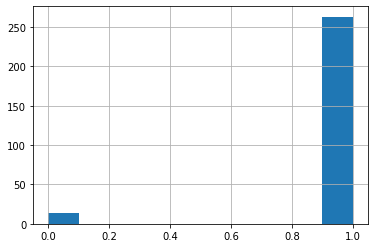

In [16]:
y_res2.hist() #90 percent imbalance
